#Libraries and data

In [5]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#import the predictions
df = pd.concat(map(pd.read_csv, ['predictions_prophet.csv',
                                 'predictions_sarimax.csv',
                                 'predictions_silverkite.csv',
                                 'predictions_lstm.csv']),
               axis = 1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,ts,silverkite,Date,lstm
0,2021-01-01,720.063342,2021-01-01,739.874430,2192,2021-01-01,751.276073,2021-01-01,746.230466
1,2021-01-02,841.835092,2021-01-02,856.312082,2193,2021-01-02,836.810713,2021-01-02,887.704921
2,2021-01-03,760.147824,2021-01-03,767.567527,2194,2021-01-03,754.985098,2021-01-03,797.325731
3,2021-01-04,885.991664,2021-01-04,907.626372,2195,2021-01-04,898.808029,2021-01-04,955.465530
4,2021-01-05,756.228988,2021-01-05,779.803534,2196,2021-01-05,781.849379,2021-01-05,805.463810


In [7]:
#Fetch what we need
df = df[["ds", "prophet", "sarimax", "silverkite", "lstm"]]
df.head(2)

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,720.063342,739.874430,751.276073,746.230466
1,2021-01-02,841.835092,856.312082,836.810713,887.704921


In [8]:
#index
df.index = df.pop('ds')
df.head(1)

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,720.063342,739.87443,751.276073,746.230466


#Ensemble

In [9]:
#change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product

[Errno 2] No such file or directory: '/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product'
/content/drive/MyDrive/Colab Notebooks/Data Science/Time Series Forecasting Product/Practice


In [12]:
#getting the error
error_prophet = float(pd.read_csv("params_prophet.csv").iloc[4,1])
error_sarimax = pd.read_csv("params_sarimax.csv").iloc[6,1]
error_silverkite = float(pd.read_csv("params_silverkite.csv").iloc[0,1])
error_lstm = pd.read_csv("params_lstm.csv").iloc[7,1]

In [13]:
#average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm)/4
print(f"The average error is {average_error}")

The average error is 59.379784759405894


In [14]:
#Initial Weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The SARIMAX weight is {weight_sarimax}")

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")

The Prophet weight is 0.3060813647392056
The SARIMAX weight is 0.24760037821287534
The Silverkite weight is 0.30991536930796393
The LSTM weight is 0.18290090624677968


In [15]:
#Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding the weights equals to {extra_weight}")

Adding the weights equals to 1.0464980185068247


#Ensemble Forecast

In [16]:
#Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.sarimax * weight_sarimax + df.silverkite * weight_silverkite + df.lstm * weight_lstm) / extra_weight

<Axes: xlabel='ds'>

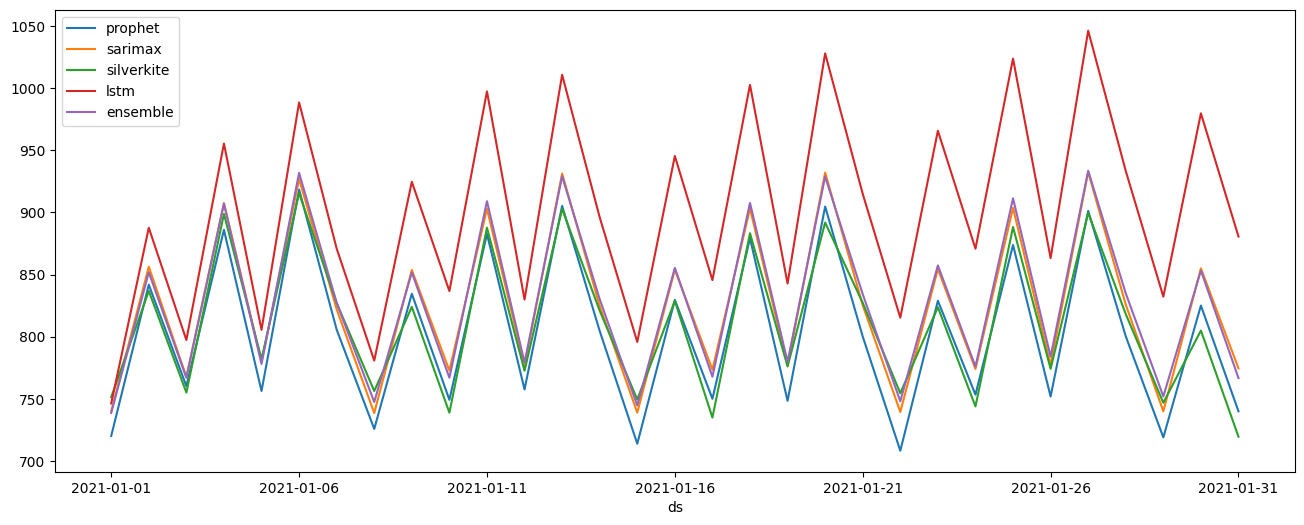

In [17]:
#Visualization
df.plot(figsize = (16,6), legend = True)